# K-Means Clustering from Scratch - Math & Implementation in Python
This notebook follows a [YouTube video](https://www.youtube.com/watch?v=fePKBTMBbhw) walkthrough. The sections below cover the Python implementation of K-Means Clustering from scratch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.datasets import make_blobs

## Initialize X
First we initialize an unlabeled dataset as the X 2D-array.

In [2]:
X = np.array([
    [1, 2],
    [2, 1],
    [4, 4],
    [4, 5]
])

Visualize the X data:

In [3]:
def plot_X(X):
    plt.figure(figsize=(4,3))
    plt.scatter(X[:,0], X[:,1], label='X data')
    plt.xlim(0,6)
    plt.ylim(0,6)
    plt.title("T-Shirt Sizes")
    plt.xlabel("Width (X1)")
    plt.ylabel("Length (X2)")

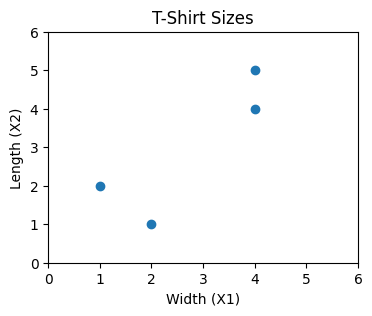

In [4]:
plot_X(X)

## Initialize Cluster Centroids
The first step to this algorithm is to initialize clusters to some random positions.

In [5]:
np.random.seed(2)
n = X.shape[1]
K = 2
centroids = np.random.uniform(0, 5, (K, n))
centroids

array([[2.17997451, 0.12963116],
       [2.74831239, 2.17661196]])

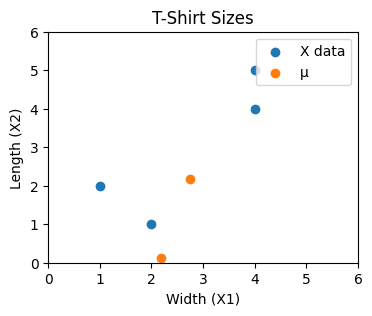

In [6]:
plot_X(X)
plt.scatter(centroids[:,0], centroids[:,1], label="μ")
plt.legend()

## Update Centroid Position
Next we will find the closest X points for each cluster. Then we can set the cluster positions to the mean of these closest X points.

In [7]:
def calc_dist(a, b):
    '''
    Calculate the distance between n-dimensional points
    '''
    n = a.shape[0]
    res = 0
    for j in range(n):
        res += (a[j] - b[j]) ** 2
    res = np.sqrt(res)
    return res

In [8]:
def assign_X_to_centroids(X, centroids):
    '''
    Find and store the closest cluster's index for each X datapoint.
    '''
    m = X.shape[0] # no. of datapoints
    K = centroids.shape[0]

    closest = np.zeros(m, dtype=int) # e.g. closest[tshirt 3] = cluster 1

    # assign each X datapoint to one centroid
    for i in range(m):
        closest_cluster_index = -1
        closest_dist = float('inf')

        x_pos = X[i]

        for k in range(K):
            c_pos = centroids[k]
            dist = calc_dist(x_pos, c_pos)
            if dist < closest_dist:
                closest_dist = dist
                closest_cluster_index = k
        closest[i] = closest_cluster_index

    return closest

In [9]:
closest = assign_X_to_centroids(X, centroids)
closest

array([1, 0, 1, 1])

In [10]:
def plot_clusters(X, centroids, closest):
    '''
    Plot the X datapoints against the clusters
    '''
    K = centroids.shape[0]
    plt.figure(figsize=(4,3))
    plt.scatter(X[:,0], X[:,1], marker='o', c=closest, cmap='jet', s=60, label='X Data')
    plt.scatter(centroids[:,0], centroids[:,1], marker='*', c=np.arange(K), cmap='jet', edgecolor='black', s=200, label='mu')
    plt.title('Visualize Closest Centroids')
    plt.xlabel("X1")
    plt.ylabel("X2")
    legend_handles = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='X Data'),
        Line2D([0], [0], marker='*', color='w', markerfacecolor='black', markersize=15, label='μ')
    ]
    plt.legend(handles=legend_handles)

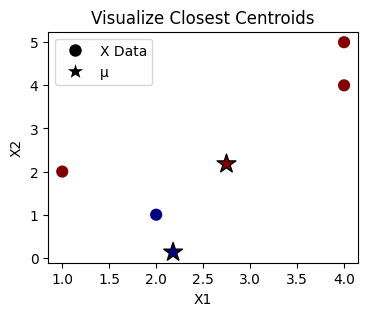

In [11]:
plot_clusters(X, centroids, closest)

In [12]:
def update_centroid_positions(centroids, X, closest):
    '''
    Set update the cluster centroids to the mean of the closest datapoints in X.
    '''
    m = X.shape[0]
    n = X.shape[1]
    K = centroids.shape[0]

    new_centroids = np.zeros_like(centroids)

    # calculate the mean position of the closest datapoints for each centroid
    for k in range(K):
        closest_cnt = 0
        closest_mean = np.zeros(n)
        for i in range(m):
            if closest[i] == k:
                closest_cnt += 1
                closest_mean += X[i]
        if closest_cnt > 0:
            closest_mean /= closest_cnt
        new_centroids[k] = closest_mean
    
    return new_centroids

In [13]:
centroids_new = update_centroid_positions(centroids, X, closest)
closest_new = assign_X_to_centroids(X, centroids_new)

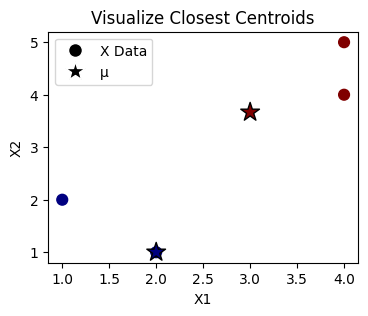

In [14]:
plot_clusters(X, centroids_new, closest_new)

Run the `update_centroid_positions` a second iteration to find the final centroid positions.

In [15]:
centroids_new = update_centroid_positions(centroids_new, X, closest_new)
closest_new = assign_X_to_centroids(X, centroids_new)

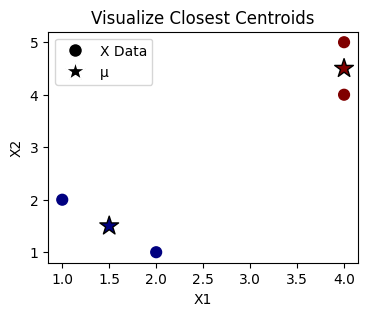

In [16]:
plot_clusters(X, centroids_new, closest_new)

## Repeat until Convergence
Write a function to update the centroid positions a total of `n_iters` times.

> Note: Updated fit function is later in the notebook where multiple fits are testing against a cost function

In [17]:
def fit(X, K, n_iters=10):
    '''
    Align centroids to the X dataset over multiple iterations.
    Return the final centroid positions and the closest centroids for each X datapoint.
    '''
    m = X.shape[0]
    n = X.shape[1]

    feature_ranges = np.zeros((n, 2))
    for j in range(n):
        feature_ranges[j, 0] = np.min(X[:,j])
        feature_ranges[j, 1] = np.max(X[:,j])

    centroids = np.zeros((K, n))

    for k in range(K):
        for j in range(n):
            centroids[k, j] = np.random.uniform(feature_ranges[j, 0], feature_ranges[j, 1])

    for iter in range(n_iters):
        closest = assign_X_to_centroids(X, centroids)
        centroids = update_centroid_positions(centroids, X, closest)
        
    return centroids, closest

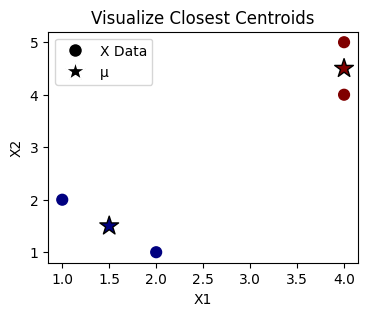

In [18]:
centroids, closest = fit(X, K=2)
plot_clusters(X, centroids, closest)

## Testing with More Data
Apply the `fit` function to more datapoints and clusters.

In [19]:
X, y = make_blobs(200, n_features=2, centers=7, random_state=10)

Text(0.5, 1.0, 'Generated Dataset')

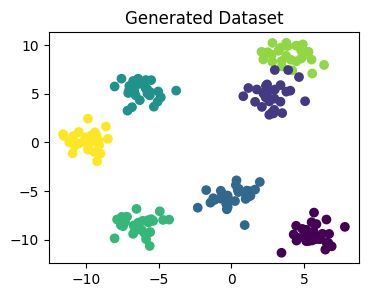

In [20]:
plt.figure(figsize=(4,3))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Generated Dataset")

In [21]:
centroids, closest = fit(X, K=7)

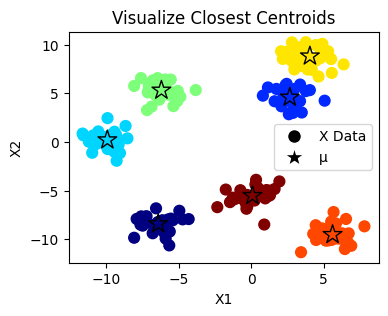

In [22]:
plot_clusters(X, centroids, closest)

## Calculate the Cost
Calculate the cost by getting the mean distance between each X datapoint and its closest cluster centroid.

In [23]:
def calc_cost(X, centroids, closest):
    '''
    Calculate the cost of the current centroids positions against their closest X datapoints.
    '''
    m = X.shape[0]

    cost = 0.

    for i in range(m):
        cost += calc_dist(X[i], centroids[closest[i]])
    cost /= m
    return cost

In [24]:
calc_cost(X, centroids, closest)
# 1.8182303887446352

1.1660731171783472

## Fit with Multiple Attempts
Apply the previous `fit` function multiple times and return the centroids that result in the lowest cost.

In [25]:
def fit(X, K, n_iters=10, n_fits=10):
    '''
    Updated fit function that attempts multiple fits and returns the centroid positions that result in the lowest cost
    Return the best centroid positions and the closest centroids for each X datapoint.
    '''
    m = X.shape[0]
    n = X.shape[1]

    min_cost = float('inf')
    best_centroids = None
    best_closest = None

    for fit in range(n_fits):
        # Ensure centroid positions are within the X feature ranges
        feature_ranges = np.zeros((n, 2))
        for j in range(n):
            feature_ranges[j, 0] = np.min(X[:,j])
            feature_ranges[j, 1] = np.max(X[:,j])
    
        centroids = np.zeros((K, n))
    
        for k in range(K):
            for j in range(n):
                centroids[k, j] = np.random.uniform(feature_ranges[j, 0], feature_ranges[j, 1])

        # Update centroid positions to mean of closest X datapoints
        for iter in range(n_iters):
            closest = assign_X_to_centroids(X, centroids)
            centroids = update_centroid_positions(centroids, X, closest)
            # Remove centroids that have no assigned X datapoints
            tmp = []
            for k in np.unique(closest):
                tmp.append(centroids[k])
            centroids = np.array(tmp)

        # Update best centroids if a new lowest cost is found
        cost = calc_cost(X, centroids, closest)
        if cost < min_cost:
            min_cost = cost
            best_centroids = centroids
            best_closest = closest
        
    return best_centroids, best_closest

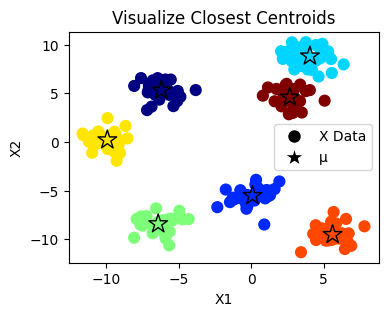

In [26]:
centroids, closest = fit(X, K=7)
plot_clusters(X, centroids, closest)

In [27]:
calc_cost(X, centroids, closest)

1.1660731171783472